In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
Airlines=pd.read_excel("Airlines+Data.xlsx")
Airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<AxesSubplot:>

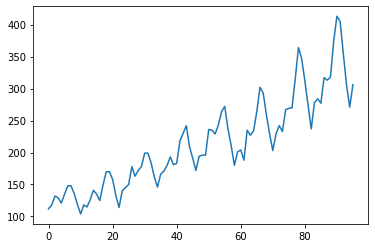

In [3]:
Airlines.Passengers.plot()


In [4]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
Airlines.isnull().sum()


Month         0
Passengers    0
dtype: int64

In [6]:
Airlines.rename(columns = {'Month' : 'date'}, inplace = True)
Airlines


,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [7]:
Airlines["month"] = Airlines.date.dt.strftime("%b") # month extraction
Airlines["year"] =Airlines.date.dt.strftime("%Y") # year extraction


In [8]:
Airlines



,date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [16]:
df=pd.get_dummies(Airlines['month'])
df

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Apr     96 non-null     uint8
 1   Aug     96 non-null     uint8
 2   Dec     96 non-null     uint8
 3   Feb     96 non-null     uint8
 4   Jan     96 non-null     uint8
 5   Jul     96 non-null     uint8
 6   Jun     96 non-null     uint8
 7   Mar     96 non-null     uint8
 8   May     96 non-null     uint8
 9   Nov     96 non-null     uint8
 10  Oct     96 non-null     uint8
 11  Sep     96 non-null     uint8
dtypes: uint8(12)
memory usage: 1.2 KB


In [18]:
df=df.iloc[:,[4,3,7,0,8,6,5,1,11,10,9,2]]
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
Airlines=pd.concat([Airlines,df],axis=1)
Airlines

,date,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
t_list=[x for x in range(1,len(Airlines)+1)]
Airlines['t']=t_list
Airlines['t_square']=Airlines['t']*Airlines['t'] 

#log_transformation
Airlines['log_passengers']=np.log10(Airlines.Passengers)
Airlines

,date,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_passengers
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2.049218
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,2.071882
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,2.120574
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,2.110590
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.082785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,2.607455
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,2.550228
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,2.485721
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,2.432969


In [23]:
Airlines1=Airlines.iloc[:,1:]
Airlines1

,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_passengers
0,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2.049218
1,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,2.071882
2,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,2.120574
3,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,2.110590
4,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.082785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,2.607455
92,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,2.550228
93,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,2.485721
94,271,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,2.432969


<AxesSubplot:xlabel='month', ylabel='year'>

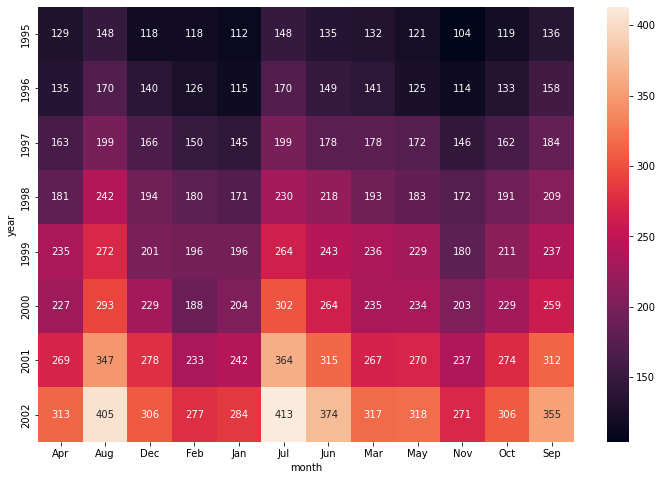

In [24]:
plt.figure(figsize=(12,8))
heatmap_y_year=pd.pivot_table(data=Airlines1,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_y_year
sns.heatmap(heatmap_y_year,annot=True,fmt="g")   # fmt is the formet of grid value


<AxesSubplot:xlabel='month', ylabel='Passengers'>

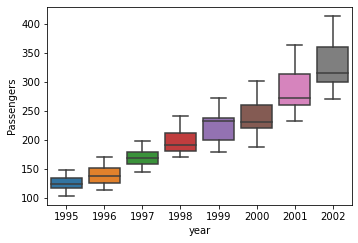

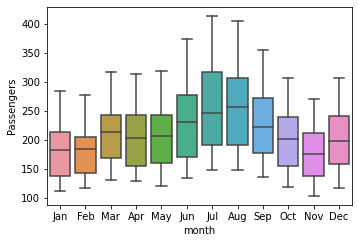

In [25]:
# Boxplot
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x="year",y="Passengers",data=Airlines1)
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x="month",y="Passengers",data=Airlines1)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

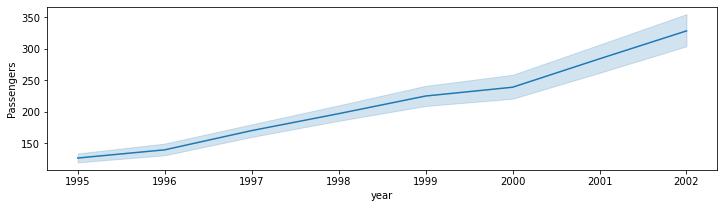

In [26]:
plt.figure(figsize=(12,3))
sns.lineplot(x='year',y='Passengers',data=Airlines1)

In [27]:
#Divide data into Tow part Train and test
from sklearn.model_selection import train_test_split
train,test=train_test_split(Airlines1,test_size=0.25)

In [28]:
#Linear model
import statsmodels.formula.api as smf
li_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(li_model.predict(pd.DataFrame(test['t']))) 
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

29.05581806871949

In [29]:
#exponential
Exp = smf.ols('log_passengers~t', data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))

In [30]:
#Quadrateric
Quad=smf.ols('Passengers~t+t_square',data=train).fit()
pred_quad=pd.Series(Quad.predict(pd.DataFrame(test[["t","t_square"]])))
rmse_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2)) 
rmse_quad

28.12250275551005

In [31]:
# Additive seasonality model
Add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea=pd.Series(Add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2)) 
rmse_add_sea

82.25652525883181

In [32]:
# Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep',
                                                         'Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))

rmse_add_sea_quad

15.477501956901486

In [33]:
# Multiplicative Seasonality
Mult_sea=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea=pd.Series(Mult_sea.predict(test))
rmse_mult_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2)) 
rmse_mult_sea

190.89684966930002

In [34]:
# Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

191.02895088901724

In [43]:
#Compare the results 

data={"Model":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)

In [44]:
table_rmse

,Model,RMSE_Values
0,rmse_linear,29.055818
1,rmse_exp,191.082203
2,rmse_quad,28.122503
3,rmse_add_sea,82.256525
4,rmse_add_sea_quad,15.477502
5,rmse_mult_sea,190.896850
6,rmse_Mult_add_sea,191.028951


### Additive Seasonality Quadratic model' has the least value of RMSE among the models prepared

In [36]:
predict_data=Airlines1.iloc[60:80,:]
predict_data

,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_passengers
60,204,Jan,2000,1,0,0,0,0,0,0,0,0,0,0,0,61,3721,2.309630
61,188,Feb,2000,0,1,0,0,0,0,0,0,0,0,0,0,62,3844,2.274158
62,235,Mar,2000,0,0,1,0,0,0,0,0,0,0,0,0,63,3969,2.371068
63,227,Apr,2000,0,0,0,1,0,0,0,0,0,0,0,0,64,4096,2.356026
64,234,May,2000,0,0,0,0,1,0,0,0,0,0,0,0,65,4225,2.369216
65,264,Jun,2000,0,0,0,0,0,1,0,0,0,0,0,0,66,4356,2.421604
66,302,Jul,2000,0,0,0,0,0,0,1,0,0,0,0,0,67,4489,2.480007
67,293,Aug,2000,0,0,0,0,0,0,0,1,0,0,0,0,68,4624,2.466868
68,259,Sep,2000,0,0,0,0,0,0,0,0,1,0,0,0,69,4761,2.413300
69,229,Oct,2000,0,0,0,0,0,0,0,0,0,1,0,0,70,4900,2.359835


In [37]:
predict_data=predict_data.drop(columns=['Passengers','log_passengers','year'])


In [38]:
model_full =  smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airlines).fit()
model_full

In [39]:
pred_new=pd.Series(add_sea_Quad.predict(predict_data))
pred_new

60    220.111142
61    215.165218
62    250.721311
63    245.070490
64    241.149826
65    277.006958
66    304.248759
67    296.387430
68    270.577538
69    241.122708
70    208.748754
71    248.644365
72    253.372325
73    248.680605
74    284.490901
75    279.094284
76    275.427824
77    311.539158
78    339.035163
79    331.428038
dtype: float64

In [41]:
predict_data['Forcast_Passenger']=pd.Series(pred_new)
predict_data


,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,Forcast_Passenger
60,Jan,1,0,0,0,0,0,0,0,0,0,0,0,61,3721,220.111142
61,Feb,0,1,0,0,0,0,0,0,0,0,0,0,62,3844,215.165218
62,Mar,0,0,1,0,0,0,0,0,0,0,0,0,63,3969,250.721311
63,Apr,0,0,0,1,0,0,0,0,0,0,0,0,64,4096,245.070490
64,May,0,0,0,0,1,0,0,0,0,0,0,0,65,4225,241.149826
65,Jun,0,0,0,0,0,1,0,0,0,0,0,0,66,4356,277.006958
66,Jul,0,0,0,0,0,0,1,0,0,0,0,0,67,4489,304.248759
67,Aug,0,0,0,0,0,0,0,1,0,0,0,0,68,4624,296.387430
68,Sep,0,0,0,0,0,0,0,0,1,0,0,0,69,4761,270.577538
69,Oct,0,0,0,0,0,0,0,0,0,1,0,0,70,4900,241.122708
